<a href="https://colab.research.google.com/github/dileep9968/pytorch/blob/main/04_pytorch_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importing Pytorch and setting up device-agnostice code

In [2]:
import torch
from torch import nn
torch.__version__

'2.5.1+cu121'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# 1. Get Data

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path/'pizza_steak_sushi'

if image_path.is_dir():
  print(f"{image_path} directory already exists")
else:
  print(f"{image_path} directory does not exits, creating one...")
  image_path.mkdir(parents=True, exist_ok = True)

  with open(data_path/'pizza_steak_sushi.zip','wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('Downloading pizza, steak, sushi data...')
    f.write(request.content)

  # unzip
  with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_ref:
    print('Unzipping pizza, steak, sushi data...')
    zip_ref.extractall(image_path)


data/pizza_steak_sushi directory does not exits, creating one...
Unzipping pizza, steak, sushi data...


## 2. Data preparation and  Exploration

In [5]:
import os
def walk_through_dir(dir_path):

  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'


In [6]:
# setupd train and test paths
train_dir = image_path /'train'
test_dir = image_path/'test'

test_dir, train_dir

(PosixPath('data/pizza_steak_sushi/test'),
 PosixPath('data/pizza_steak_sushi/train'))

## 2.1 Visualizing and image

data/pizza_steak_sushi/train/pizza/702165.jpg
Random image Path: data/pizza_steak_sushi/train/pizza/702165.jpg
Image class: pizza
Image height: 512
Image width: 512


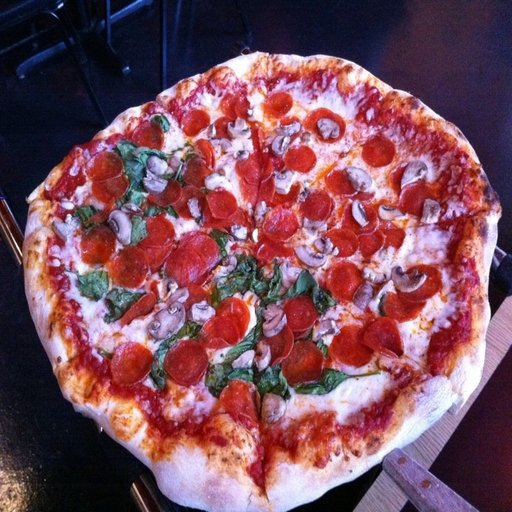

In [7]:
import random
from PIL import Image

#random.seed(42)

image_path_list = list(image_path.glob('*/*/*.jpg'))

random_image_path = random.choice(image_path_list)

print(random_image_path)

image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
img

print(f"Random image Path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

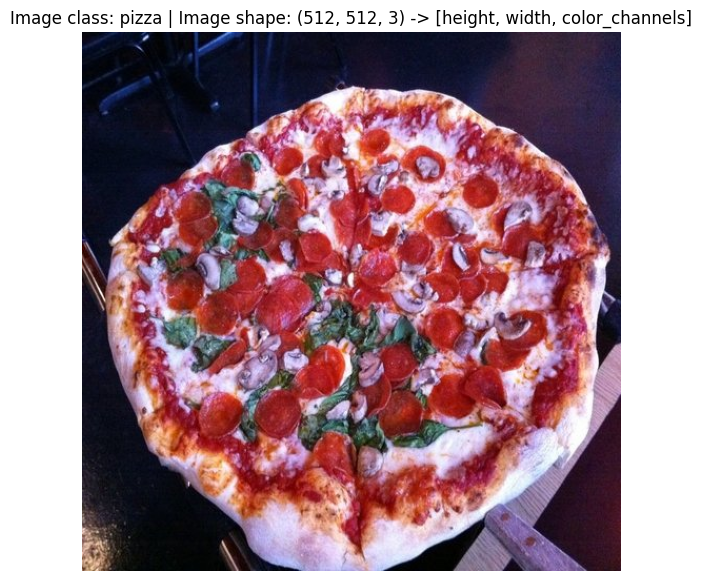

In [8]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")

plt.axis(False)
#

## 3. Transforming data

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


## 3.1 Transforming data with torchvison.transforms

In [10]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    # Flip the iamges randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [11]:
data_transform(img)

tensor([[[0.1333, 0.1529, 0.1843,  ..., 0.0431, 0.0353, 0.0353],
         [0.1333, 0.1569, 0.1922,  ..., 0.0314, 0.0471, 0.0510],
         [0.1294, 0.1529, 0.1882,  ..., 0.0275, 0.0196, 0.0235],
         ...,
         [0.2431, 0.2157, 0.1961,  ..., 0.5882, 0.6235, 0.7216],
         [0.2353, 0.2118, 0.1922,  ..., 0.5882, 0.6824, 0.7255],
         [0.2078, 0.1882, 0.1843,  ..., 0.5569, 0.7765, 0.7059]],

        [[0.1216, 0.1333, 0.1373,  ..., 0.0784, 0.0549, 0.0353],
         [0.1176, 0.1216, 0.1333,  ..., 0.0627, 0.0745, 0.0706],
         [0.1216, 0.1176, 0.1294,  ..., 0.0549, 0.0510, 0.0510],
         ...,
         [0.0824, 0.0745, 0.0706,  ..., 0.4627, 0.4784, 0.5686],
         [0.0784, 0.0784, 0.0706,  ..., 0.4431, 0.5333, 0.5725],
         [0.0745, 0.0745, 0.0706,  ..., 0.4235, 0.6196, 0.5569]],

        [[0.2275, 0.2353, 0.2392,  ..., 0.1922, 0.1255, 0.0863],
         [0.2431, 0.2431, 0.2431,  ..., 0.1686, 0.1843, 0.1765],
         [0.2549, 0.2549, 0.2510,  ..., 0.1176, 0.1255, 0.

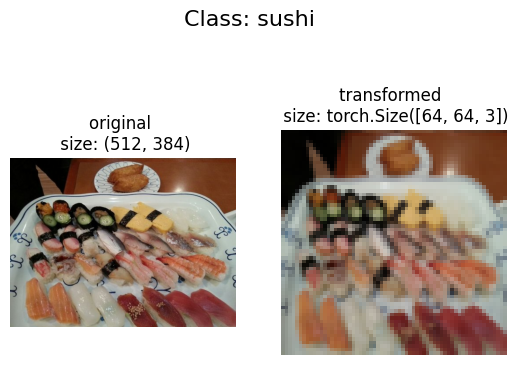

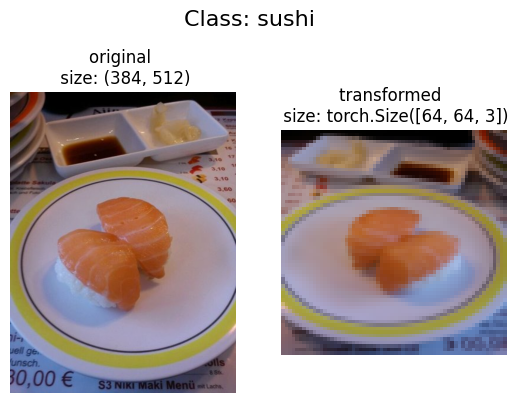

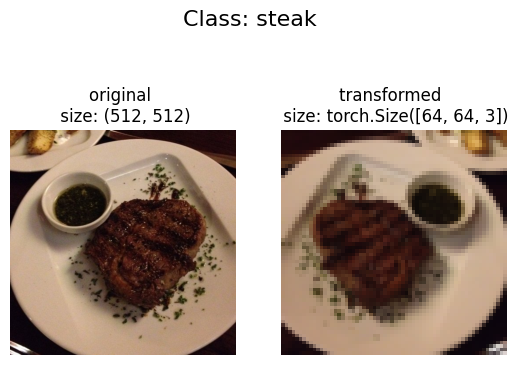

In [12]:
def plot_transformed_images(image_paths, transforms,n=3,seed=42):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"original \n size: {f.size}")
      ax[0].axis(False)

      transformed_image = transforms(f).permute(1,2,0) #(c,h,w)->(h,w,c)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"transformed \n size: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transforms=data_transform,
                        n=3,
                        seed=42)

## 4. Option 1: Loading image data from image folder

In [13]:
# use ImageFolder to carete dataset
from torchvision import datasets

train_data = datasets.ImageFolder(root = train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [14]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [15]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
len(train_data), len(test_data)

(225, 75)

In [18]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [19]:
# Index on train_data datasets to get a single label
img, label = train_data[0]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Image class: {class_names[label]}")
print(f"Label datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
permuted shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


(-0.5, 63.5, 63.5, -0.5)

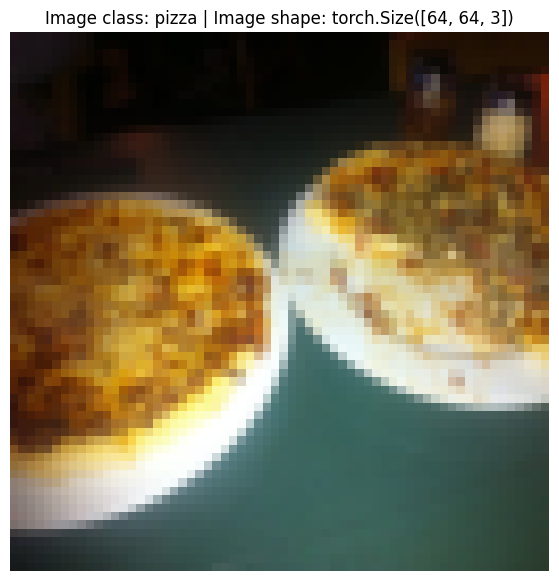

In [20]:
# Reaggarne the order dimensions
img_permute = img.permute(1,2,0)

print(f"original shape: {img.shape} -> [color_channels, height, width]")
print(f"permuted shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f"Image class: {class_names[label]} | Image shape: {img_permute.shape}")
plt.axis(False)

## 4.1 Turn loaded image into dataloader

In [21]:
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers = os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x791717a8a0b0>,
 <torch.utils.data.dataloader.DataLoader at 0x791717a89690>)

In [22]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [23]:
img, label = next(iter(train_dataloader))


print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Image class: {class_names[label]}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Image datatype: torch.float32
Image label: tensor([2])
Image class: sushi


## 5 option 2: Loading Image data with a custom dataset

In [24]:
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [25]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating helper function to get class names

In [26]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

class_names_found = sorted([entry.name for entry in os.scandir(target_directory) if entry.is_dir()])
print(f"Class names: {class_names_found}")

Target dir: data/pizza_steak_sushi/train
Class names: ['pizza', 'steak', 'sushi']


In [27]:
def find_classes(directory:str)-> Tuple[List[str], Dict[str,int]]:
  class_names = sorted([entry.name for entry in os.scandir(directory) if entry.is_dir()])
  if not class_names:
    raise FileNotFoundError(f"No directories found in {directory}....please check file structure ")
  class_to_idx = {cls_name:i for i, cls_name in enumerate(class_names)}

  return class_names,class_to_idx

In [28]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom dataset to replicate ImageFolder

In [29]:
# Write a custom dataset class
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  # initilize custom dataset
  def __init__(self, targ_dir:str, transform=None):
    # create class atributes
    self.path = list(pathlib.Path(targ_dir).glob("*/*.jpg"))

    # setup transforms
    self.transform = transform

    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index:int)->Image.Image:
    image_path = self.path[index]
    return Image.open(image_path)

  def __len__(self)->int:
    return len(self.path)

  # Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index:int)->Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.path[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx


In [30]:
# Create a transform
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    # Flip the iamges randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [31]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                    transform=train_transform)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transform)

In [32]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7917b8910f10>,
 <__main__.ImageFolderCustom at 0x7917b8912e30>)

In [33]:
len(test_data_custom), len(train_data_custom)
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [34]:
# Check for equality between original imagefolder dataset and imagefoldercustom dataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


### 5.3 Create a function to disply random images

In [35]:
#1. Create a function to take in a datset
def display_random_images(datasets: torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n:int=10,
                          display_shape:bool=True,
                          seed:int=None):
  # Adject display if n is too high
  if n>10:
    n=10
    display_shape=False
    print(f"For disply, purpose n shoudn't be larger than 10")

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(datasets)),k=n)
  plt.figure(figsize=(16,8))
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = datasets[targ_sample][0], datasets[targ_sample][1]

    # adjust tensor dimesnion for plotting
    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title+ f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

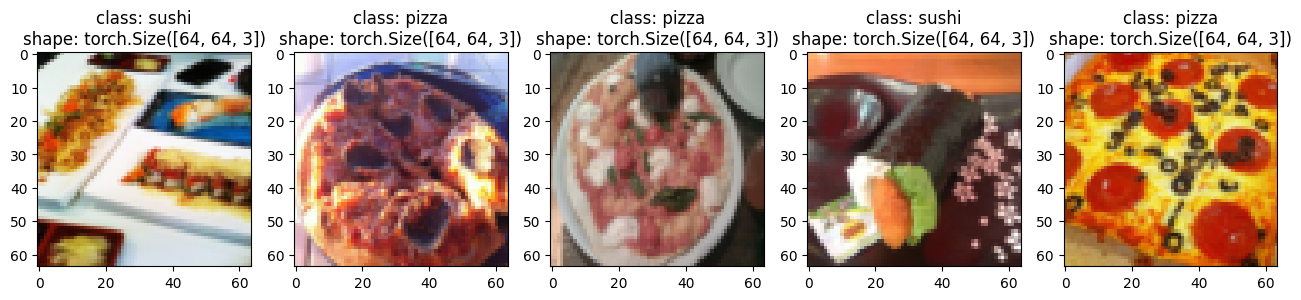

In [36]:
# Display random images from the imageFolder
display_random_images(datasets=train_data,
                      classes=class_names,
                      n=5,
                      seed=42)

For disply, purpose n shoudn't be larger than 10


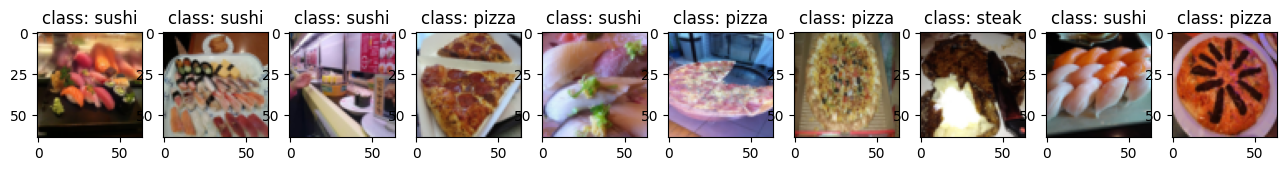

In [37]:
# Display random imags from the imageFolderCustom dataset
display_random_images(train_data_custom,
                      n=20,
                      classes=train_data_custom.classes,
                      seed=None)

### 5.4 Turn custom loaded images into DataLoader

In [38]:
from torch.utils.data import DataLoader

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count(),
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=os.cpu_count(),
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x791717a08af0>,
 <torch.utils.data.dataloader.DataLoader at 0x791717a093c0>)

In [39]:
# Et image and label from custom dataloader
image_custom, label_custom = next(iter(train_dataloader_custom))
print(f"Image shape: {image_custom.shape}")
print(f"Image datatype: {image_custom.dtype}")
print(f"Image label: {label_custom}")

Image shape: torch.Size([1, 3, 64, 64])
Image datatype: torch.float32
Image label: tensor([1])


## 6. Other from of transform ( data augmentation)
Data augmentiaotn is the process of artificially adding diversity to your training data
In the case of iamge data this may mean applying various image transformation to the training images


Let's take a look at one particular type of data augmentation used to train pytorch vision model to state of art levels

In [40]:
# Let look at trivailaugment

from torchvision import transforms

train_transform  = transforms.Compose([transforms.Resize(size=(224,224)),
                                       transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                       transforms.ToTensor()
                                       ])

test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor()
                                     ])

In [41]:
image_path

PosixPath('data/pizza_steak_sushi')

In [42]:
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:5]

[PosixPath('data/pizza_steak_sushi/train/sushi/2574453.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/794647.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/307738.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1280119.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/700405.jpg')]

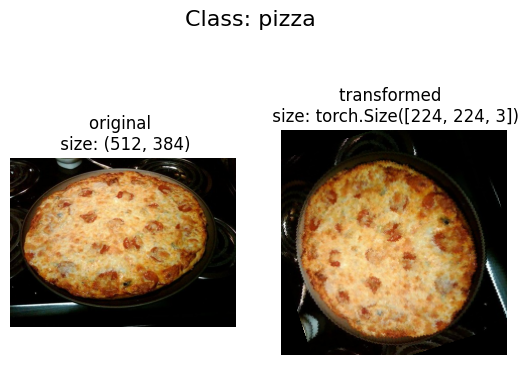

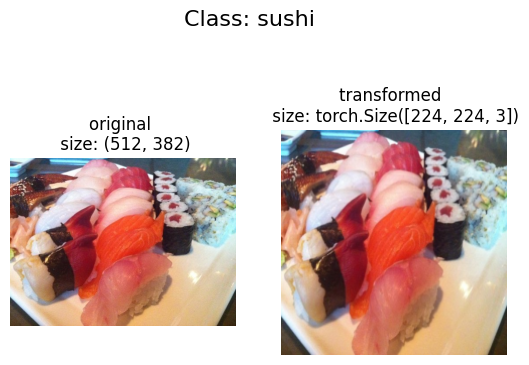

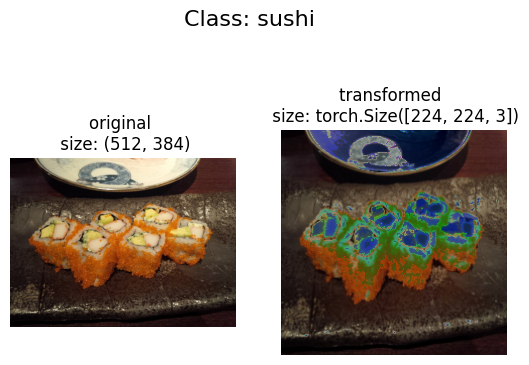

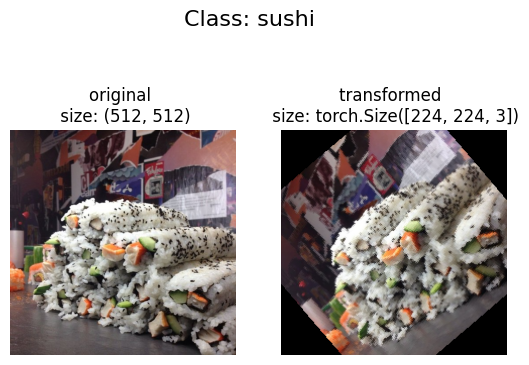

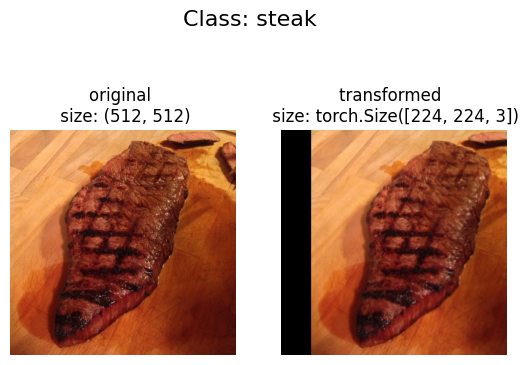

In [43]:
# Plot random transformed images
plot_transformed_images(image_paths=image_path_list,
                        transforms = train_transform,
                        n=5,
                        seed=None)

## 7. Model 0: tinnyVGG model without data augmentation

### 7.1 Creating transforms and loading data for model 0

In [44]:
# create sample transform
simple_transform = transforms.Compose([
                                        transforms.Resize(size=(64,64)),
                                        transforms.ToTensor()
                                       ])

In [45]:
# 1. Load and transform data
from torchvision import datasets
train_data_sample = datasets.ImageFolder(root=train_dir,
                                          transform= simple_transform,
                                         )

test_data_sample = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE=32
NUM_WORKERS = os.cpu_count()

train_dataloader_sample = DataLoader(dataset=train_data_sample,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_sample = DataLoader(dataset=test_data_sample,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### 7.2 Create TinyVGG Model Class

In [46]:
class TinyVGG(nn.Module):

  def __init__(self, input_shape:int, hidden_units:int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding = 0
                 ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size =3,
            padding=0,
            stride = 1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            padding = 0,
            stride=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*13*13,
                  out_features = output_shape)
    )

  def forward(self, x:torch.Tensor):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [47]:
torch.manual_seed(42)
model_o = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_o

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a foward pass on a single image ( to test mmodel)

In [48]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_sample))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [49]:
# Try a forward pass
model_o.eval()
with torch.inference_mode():
  pred = model_o(image_batch.to(device))


### 7.4 use torchinfo to get an idea of the shapes going through our model

In [50]:
try:
  import torchinfo
except:
  !pip install torchinfo

from torchinfo import summary
summary(model_o, input_size=(1,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## 7.5 Create train and test loops function

In [52]:
# Crete train_step()

def train_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device):
  model.train()

  train_loss, train_acc = 0,0

  for batch, (x,y) in enumerate(dataloader):
    x,y = x.to(device), y.to(device)

    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # adjust metrice to get avg loss and acc per batch
  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)

  return train_loss, train_acc

In [53]:
# Create a test step

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  model.eval()
  test_loss, test_acc = 0,0

  with torch.inference_mode():

    for batch, (x,y) in enumerate(dataloader):
      x, y = x.to(device), y.to(device)

      test_pred_logits = model(x)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
      test_acc += (test_pred_labels == y).sum().item()/len(test_pred_labels)

      # adjust metrice to get avg loss and acc per batch
  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)

  return test_loss, test_acc


### 7.6 Create a train() function to combine train_step() and test_step()

In [54]:
from tqdm.auto import tqdm

In [56]:
# Create a train function that takes in varous model parameters, optimizer

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs:int=5,
          device = device):

  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}

  #3. Loop through traning and testing steps for number of epochs

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                        dataloader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer,
                                        device=device)
    test_loss, test_acc = test_step(model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)


    print(f"Epoch: {epoch} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

### 7.7 Traina and evulate model 0

In [64]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Recreate an intance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.0001)

# Start the timer
from timeit import default_timer as timer

start_time = timer()
model_0_results = train(model=model_0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS,
                       device=device)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 1.0992 | train_acc: 0.3867 | test_loss: 1.0997 | test_acc: 0.3600
Epoch: 1 | train_loss: 1.0908 | train_acc: 0.4267 | test_loss: 1.0873 | test_acc: 0.4000
Epoch: 2 | train_loss: 1.0598 | train_acc: 0.5244 | test_loss: 1.0637 | test_acc: 0.4267
Epoch: 3 | train_loss: 0.9952 | train_acc: 0.5200 | test_loss: 1.0129 | test_acc: 0.3867
Epoch: 4 | train_loss: 0.9278 | train_acc: 0.5644 | test_loss: 1.0043 | test_acc: 0.3333
Epoch: 5 | train_loss: 0.8942 | train_acc: 0.5822 | test_loss: 0.9953 | test_acc: 0.3600
Epoch: 6 | train_loss: 0.8686 | train_acc: 0.5911 | test_loss: 1.0056 | test_acc: 0.3600
Epoch: 7 | train_loss: 0.8614 | train_acc: 0.5867 | test_loss: 0.9983 | test_acc: 0.4667
Epoch: 8 | train_loss: 0.8420 | train_acc: 0.6089 | test_loss: 1.0031 | test_acc: 0.4667
Epoch: 9 | train_loss: 0.8367 | train_acc: 0.6133 | test_loss: 1.0217 | test_acc: 0.4533
Epoch: 10 | train_loss: 0.8324 | train_acc: 0.6267 | test_loss: 0.9767 | test_acc: 0.4533
Epoch: 11 | train_lo

### 7.8 Plot the loss curve of model

In [61]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [65]:
def plot_loss_curves(results:Dict[str, List[float]]):
  train_loss = results["train_loss"]
  test_loss = results["test_loss"]

  train_acc = results["train_acc"]
  test_acc = results["test_acc"]

  epochs = range(len(train_loss))

  plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(epochs, train_loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.legend()


  plt.subplot(1,2,2)
  plt.plot(epochs, train_acc, label="train_acc")
  plt.plot(epochs, test_acc, label="test_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

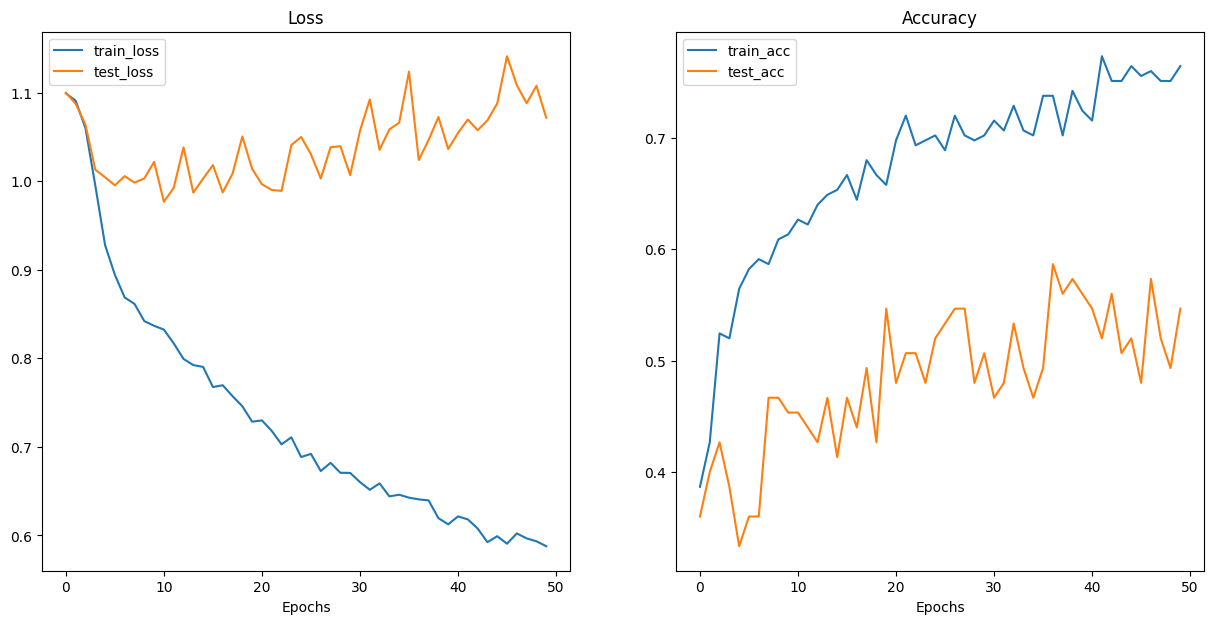

In [66]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like